In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from google.colab import files

In [ ]:
data=pd.read_csv(r"/content/hypertension_data.csv")
correlation_matrix = data.corr()
target_correlation = correlation_matrix['target'].drop('target')

target_correlation

,target
age,-2.354715e-02
sex,4.951044e-16
cp,4.338210e-01
trestbps,-1.485082e-01
chol,-8.211748e-02
fbs,-3.358049e-02
restecg,1.360681e-01
thalach,4.190405e-01
exang,-4.381167e-01
oldpeak,-4.381349e-01


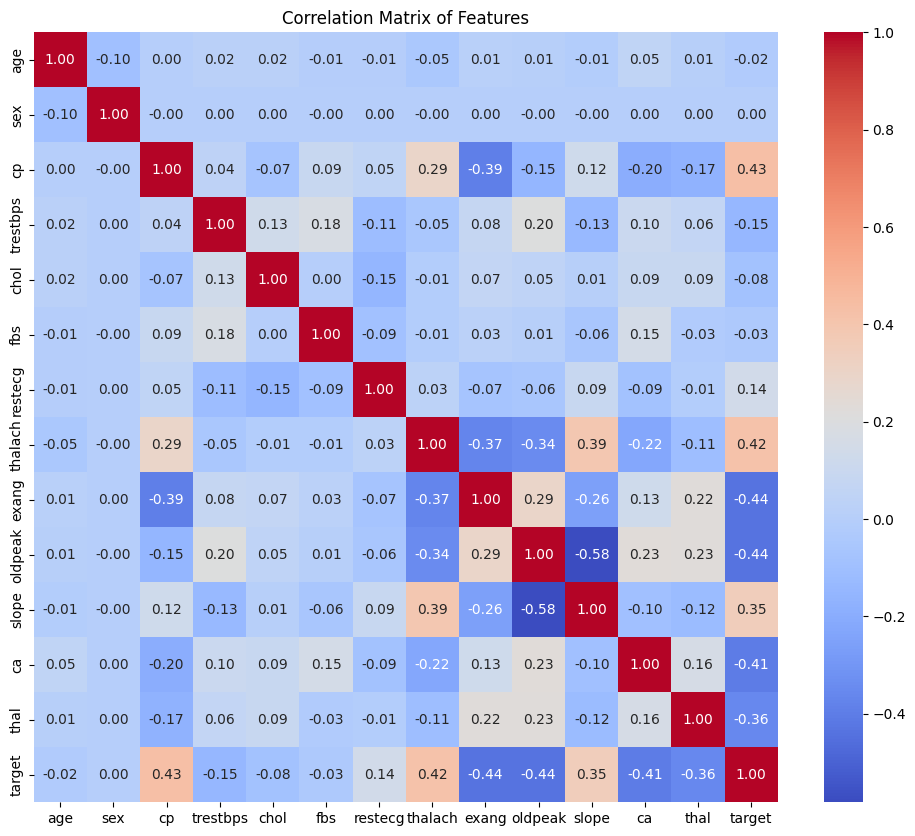

In [ ]:
# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
#Removing Duplicates
data = data.drop_duplicates()

# Drop specified columns
data = data.drop(['age', 'sex', 'fbs', 'restecg', 'exang', 'slope'], axis=1)

#Splitting Data
y=data['target']
x=data.drop('target', axis=1)

#Imputing
imputer = SimpleImputer(strategy='most_frequent')
x = pd.DataFrame(imputer.fit_transform(x), columns=x.columns)

#Scaling
scaler = StandardScaler()
scaler.fit(x)
x = pd.DataFrame(scaler.transform(x), columns=x.columns)


In [ ]:
#Splitting Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
#Random Forest Classifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred_1 = rf.predict(x_test)

print("Accuracy Score: ", accuracy_score(y_test, y_pred_1))
print(classification_report(y_test, y_pred_1))

Accuracy Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3533
           1       1.00      1.00      1.00      4292

    accuracy                           1.00      7825
   macro avg       1.00      1.00      1.00      7825
weighted avg       1.00      1.00      1.00      7825



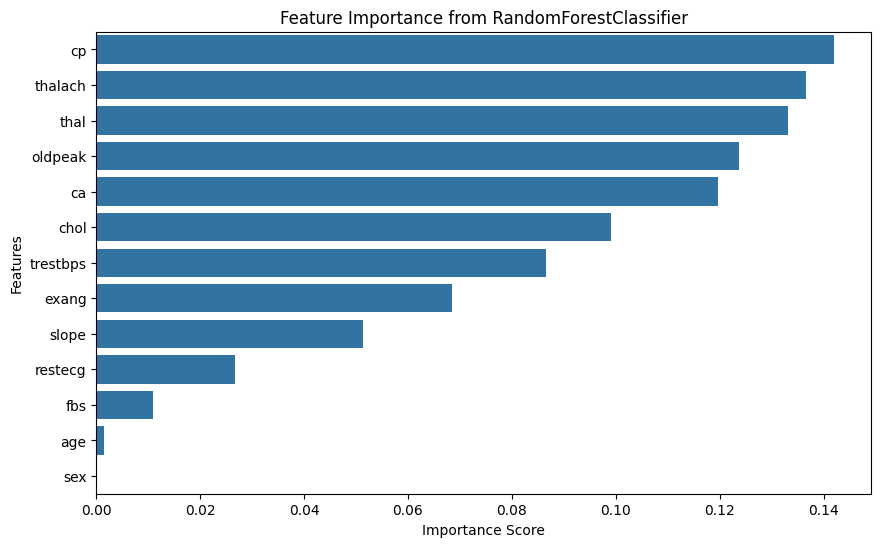

In [ ]:
#Support Vector Machine Classfier

svc = SVC(kernel='rbf', C=10, random_state=42)
svc.fit(x_train, y_train)
y_pred_2 = svc.predict(x_test)

print("Accuracy Score: ", accuracy_score(y_test, y_pred_2))
print(classification_report(y_test, y_pred_2))

Accuracy Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3533
           1       1.00      1.00      1.00      4292

    accuracy                           1.00      7825
   macro avg       1.00      1.00      1.00      7825
weighted avg       1.00      1.00      1.00      7825



In [ ]:
testing_true=[3, 145, 233, 150, 2.3, 0, 1]
testing_false=[0, 130, 330, 169, 0, 0, 2]

testing_true=scaler.transform([testing_true])
testing_false=scaler.transform([testing_false])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
print(svc.predict(testing_true))
print(svc.predict(testing_false))

[1]
[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
filename = 'hypertension.pkl'
pickle.dump(svc, open(filename, 'wb'))
files.download('hypertension.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>